In [1]:
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import cv2
import random

### Read Image

In [3]:
img=cv2.imread('rainbow.jpg',-1 )# color image
img_gray=cv2.imread('rainbow.jpg',0 ) #grayscale
img=cv2.imread('rainbow.jpg',1 ) #original unchanged with alpha/additional channels

Always check the extension , rainbow.png, will not load if the original image is rainbow.jpg

#### Function to add Noise on image

In [9]:
def add_noise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        img[y_coord][x_coord] = 0
          
    return img

In [35]:
#adding noise to grayscale image or binary
img_gray_noise=add_noise(img_gray)
#Adding Noise to color image
img_noise=add_noise(img[:,:,0])  #added noise to one channel
img_noise=cv2.merge((img_noise,img[:,:,1],img[:,:,2])) #merge the noised channel with other two channels

### Resizing the image

In [6]:
img2=cv2.resize(img,(100,100))  #resize the image to different pixel value ,, here change to 100X 100 pixel

In [ ]:
img2=cv2.resize(img,(0,0),fx=2,fy=1.5)  #resize wrt the ratio, here double x and 1.5 times y increased, but make pixel (0,0)

### Write an Image

In [ ]:
cv2.imwrite('LenaGray_DSA19SEP2020.png',img_gray)

#### Copy a part of image and paste it to another

In [33]:
part =img[100:200,100:200,:]

In [34]:
img[300:400,300:400,:]=part

### Image Show

In [36]:
cv2.imshow('First image',img_noise)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
#multiple images at a time
cv2.imshow('imageColor',img)
cv2.imshow('imageGray',gray)
cv2.imshow('image',img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

### Split and Merge Channels

In [ ]:
b,g,r=cv2.split(img)  #split each channel
imgjoin=cv2.merge((b,g,r)) #merge each channel to original picture

###### Changing Color Space

In [9]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [10]:
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

In [11]:
gray = cv2.cvtColor(img[:,:,:], cv2.COLOR_BGR2GRAY)  #convert to grayscale
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGR to RGB
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #BGR to HSV
# rgb to YCbCr

In [28]:
# grayscale to binary
threshold = 63 
img_bin = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)[1] #convert greyscale  to binary image
#first output is the thresold value, second is image so to ge

In [35]:
np.unique(img)

In [38]:
unique, counts = np.unique(img, return_counts=True)
result = np.column_stack((unique, counts)) #to get the count of each pixel
print (result)

### Thresholding

In [9]:
ret,thresh1 = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY)
#ret,thresh2 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)
#ret,thresh3 = cv2.threshold(img_gray,200,255,cv2.THRESH_TRUNC)
#ret,thresh4 = cv2.threshold(img_gray,200,255,cv2.THRESH_TOZERO)
#ret,thresh5 = cv2.threshold(img_gray,200,255,cv2.THRESH_TOZERO_INV)

###### Adaptive Thresholding

 cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

In [ ]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

In [ ]:
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                             cv2.THRESH_OTSU)  

###### Example for adaptive Thresholding

In [27]:
img=cv2.imread('car.jpg',-1 )# color image
img_gray=cv2.imread('car.jpg',0 ) #grayscale
img=cv2.imread('car.jpg',1 ) #original unchanged with alpha/additional channels

In [28]:
th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#ret, th4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)
ret,th4 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

In [44]:
#multiple images at a time
cv2.imshow('binary',thresh1)
cv2.imshow('mean',th2)
cv2.imshow('gau',th3)
cv2.imshow('ots',th4)
cv2.imshow('image',img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
np.unique(th2)

array([  0, 255], dtype=uint8)

### Histogram Equilization

In [46]:
dst = cv.equalizeHist(img_gray)

<AxesSubplot:ylabel='Count'>

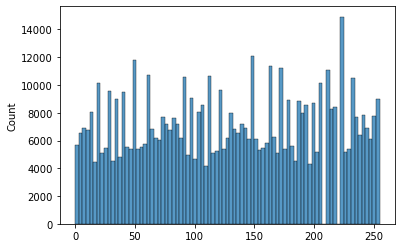

In [48]:
sns.histplot(np.ravel(dst))

<AxesSubplot:ylabel='Count'>

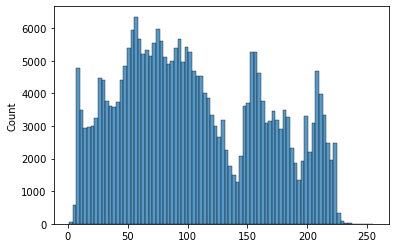

In [54]:
sns.histplot(np.ravel(img_gray))

### Smoothening /Denoising Filters

In [15]:
img_med=cv.medianBlur(img_noise,55) #kernel size   #Median Filter

In [17]:
#cv.GaussianBlur(img, ksize, sigmaX[, dst[, sigmaY[, borderType]]])  #Gaussian Filter

blur = cv2.GaussianBlur(img_noise,(5,55),0,2)  #example with standard sd and kernel size 5x55
"""
img-input image
ksize-Output image same as input
Ksize-Gaussian kernel size. ksize.width and ksize.height can differ but both must be positive and odd. Or,
        they can be zero's and then they are computed from sigma.
SigmaX -SD x direction , if it zero it will take same as the 
simaY -SD y direction
 if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.
        width and ksize.heigh
bordetype -0 -constant
           1-border replicate
           2-border reflect
"""
#cv.getGaussianKernel(5,555,5) # to ger a kernel

"\nimg-input image\nksize-Output image same as input\nKsize-Gaussian kernel size. ksize.width and ksize.height can differ but both must be positive and odd. Or,\n        they can be zero's and then they are computed from sigma.\nSigmaX -SD x direction , if it zero it will take same as the \nsimaY -SD y direction\n if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.\n        width and ksize.heigh\nbordetype -0 -constant\n           1-border replicate\n           2-border reflect\n"

In [43]:
#cv.bilateralFilter(src, d, sigmaColor, sigmaSpace,border)   #BILATERAL FILTER
#sigmacolor -gaussian or spacial weight
#sigmaspace -range  weight #refer ppt for details
img_bil=cv.bilateralFilter(img_noise, 5, 20, 100,1)
"""
Sigma values: For simplicity, you can set the 2 sigma values to be the same. 
              If they are small (< 10), the filter will not have much effect, 
               whereas if they are large (> 150), they will have a very strong effect, 
               making the image look "cartoonish".
Filter size: Large filters (d > 5) are very slow, so it is recommended to use d=5 for 
            real-time applications, and perhaps d=9 for offline applications that need 
            heavy noise filtering.
"""

'\nSigma values: For simplicity, you can set the 2 sigma values to be the same. \n              If they are small (< 10), the filter will not have much effect, \n               whereas if they are large (> 150), they will have a very strong effect, \n               making the image look "cartoonish".\nFilter size: Large filters (d > 5) are very slow, so it is recommended to use d=5 for \n            real-time applications, and perhaps d=9 for offline applications that need \n            heavy noise filtering.\n'

In [40]:
#dst = cv2.fastNlMeansDenoisingColored(img,None,h,hcolor,templatewindow size,Searchwindowsize)
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21) #color image
"""
src : Input 8-bit 3-channel image.
dst : Output image with the same size and type as src .
h : Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise.
templateWindowSize : Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
searchWindowSize : Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
"""

'\nsrc : Input 8-bit 3-channel image.\ndst : Output image with the same size and type as src .\nh : Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise.\ntemplateWindowSize : Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels\nsearchWindowSize : Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels\n'

### Edge Detection

In [33]:
np.set_printoptions(threshold=np.inf)

In [12]:
img=cv2.imread('edges.jpg',-1 )# color image
img_gray=cv2.imread('edges.jpg',0 ) #grayscale

In [13]:
#Sobel
sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)  # y

In [51]:
#Prewitt 
kernelprey = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])  
kernelpre = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prex=cv2.filter2D(img_gray, -1, kernelprex)
prey=cv2.filter2D(img_gray, -1, kernelprey)
kernelx

In [87]:
#Roberts
kernelrobx = np.array([[1, 0], [0, -1]]) #
kernelroby = np.array([[0, 1], [-1, 0]])
robx = cv2.filter2D(img_gray, -1, kernelrobx)
roby = cv2.filter2D(img_gray, -1, kernelroby)

In [84]:
#Canny Edge
img_canny = cv2.Canny(img_gray,100,200) #canny edge

In [85]:
# to visualize the image
cv2.imshow('x&y',robx+roby)
cv2.imshow('x',robx)
cv2.imshow('y',roby)
cv2.imshow('origi',img_gray[24:40,55:68])
cv2.waitKey()
cv2.destroyAllWindows()

In [86]:
#code to visualize the pixel values
#img_gray[24:40,56:68]
#roby[24:40,56:68]

### Morphological Operations

In [6]:
img=cv2.imread('word.jpg',-1 )# color image
img_gray=cv2.imread('word.jpg',0 ) #grayscale

cv2.imshow('origi',img_gray)
cv2.imshow('er',eroded)
cv2.imshow('dia',dilate)
cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
#CREATING A STRUCTURAL ELEMENT
kernelSize = (5, 5)# (5, 5), (7, 7)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize) 
kernel
#this function requires two arguments: the first is the type of structuring element ,cv2.MORPH_CROSS , cv2.MOPRH_ELLIPSE
#second is the size of the structuring element

In [5]:
#ERROTION /DILATION
eroded = cv2.erode(img_gray.copy(), None, iterations=5) #more iterations more part will erode
dilate = cv2.dilate(img_gray.copy(), None, iterations=5)
#Three arguments, first image, second size of structureal element, third no of times operation to be done
#if structural element is None , then a 3X3 Struct element will use by default
#in this hyper parameter is size of structural element and iterations

In [ ]:
#OPENING /CLOSING
opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
#it has three arguments, first is image, second is type of morph oper(opening/closing/) 
#third is size of structural element
#in this hyper parameter is size of structural element

In [ ]:
#MORPHOLOGICAL OPERATION
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
#Hyperparameter is the size of the kernel

In [32]:
cv2.imshow('eroded',eroded)
cv2.imshow('origi',img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

#### Draw Contours

In [47]:
h=300
w=100
#imgl=cv2.line(img,(0,0),(h,w),(255,0,0),10)  #cv2.line(img,(startpoint)(endpoint),(color),width of line)

In [ ]:
#cv2.line(img,(topleft),(bottom right),(color),width of line/fill option)
imgl=cv2.rectangle(img,(0,0),(h,w),(255,0,0),-1)  #inlast if we give -1 , it will gill the whole rectangle ,
imgl=cv2.rectangle(img,(0,0),(h,w),(255,0,0),5) #a positive value will considered as the width of the line

In [49]:
imgl=cv2.circle(img,(100,100),60,(255,0,0),-1)
img2=cv2.circle(img,(100,100),60,(255,0,0),3)

###### polygons

In [53]:
img.shape

(460, 819, 3)

In [57]:
W=img.shape[1]
H=img.shape[0]

In [70]:

def my_polygon(img):
    line_type = 8
    # Create some points
    ppt = np.array([[W / 4, 7 * W / 8], [3 * W / 4, 7 * W / 8],
                    [3 * W / 4, 13 * W / 16], [11 * W / 16, 13 * W / 16],
                    [19 * W / 32, 3 * W / 8], [3 * W / 4, 3 * W / 8],
                    [3 * W / 4, W / 8], [26 * W / 40, W / 8],
                    [26 * W / 40, W / 4], [22 * W / 40, W / 4],
                    [22 * W / 40, W / 8], [18 * W / 40, W / 8],
                    [18 * W / 40, W / 4], [14 * W / 40, W / 4],
                    [14 * W / 40, W / 8], [W / 4, W / 8],
                    [W / 4, 3 * W / 8], [13 * W / 32, 3 * W / 8],
                    [5 * W / 16, 13 * W / 16], [W / 4, 13 * W / 16]], np.int32)
    ppt = ppt.reshape((-1, 1, 2))
    imgp=cv2.fillPoly(img, [ppt], (255, 255, 255), line_type)
    return imgp

In [60]:
y=my_polygon(img)

#### Template Matching

In [483]:
image=cv2.imread('tulip_garden.jpg',0)
template=cv2.imread('tulip_1.jpg',0)

In [484]:
template.shape

(91, 86)

In [485]:
h,w=template.shape

In [495]:
template=cv2.resize(template,(0,0),fx=1,fy=1)

In [496]:
image.shape

(635, 1133)

In [497]:
template.shape

(23, 22)

In [498]:
methods=[cv2.TM_CCOEFF]
for method in methods:
    img2=image.copy()
    result=cv2.matchTemplate(image,template,method)
    min_val,max_val,min_loc,max_loc =cv2.minMaxLoc(result)
    print(min_loc,max_loc)
    

(537, 610) (477, 593)


In [499]:
location =max_loc
bottom =(location[0] +w ,location[1]+h)

In [500]:
result=cv2.rectangle(img2,location,bottom,255,5)

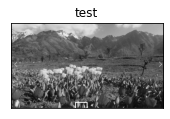

In [501]:
Image_Show(result,'test')

In [502]:
cv2.imshow('dst',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### MASKING ON AN IMAGE

#### Blending

In [150]:
img1 = cv2.imread('rainbow.jpg')
img1.shape

(598, 1011, 3)

In [151]:
img2=img1[0:460,0:819,:]

In [171]:
dst = cv2.addWeighted(img,.5,img2,.9,0)

In [172]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [125]:
rows,cols,channels = img2.shape
rows=rows/2
cols=cols/2
rows

230.0

In [135]:
img1 = cv.imread('test.jpg')
img2 = cv.imread('rainbow.jpg')

In [136]:
img1.shape

(460, 819, 3)

In [137]:
img2.shape

(598, 1011, 3)

In [139]:
img2=img2[0:460,0:819,:]

In [140]:
img2.shape

(460, 819, 3)

In [146]:
# Load two images

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
rows
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',dst)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\core\src\arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [31]:
kernel2 = np.array([[-1,-1,-1], [-1, 9,-1], [-1,-1,-1]])
im2 = cv2.filter2D(img2, -1, kernel2)
